In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification

In [2]:
X, y = make_classification(n_samples=50000, n_features=15, n_informative=10, n_redundant=5,
                           n_classes=2, weights=[0.7], class_sep=0.7, random_state=15)

In [3]:
X.shape, y.shape

((50000, 15), (50000,))

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=15)

In [6]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((37500, 15), (37500,), (12500, 15), (12500,))

In [7]:
from sklearn import linear_model

In [8]:
# alpha : float
# Constant that multiplies the regularization term. 

# eta0 : double
# The initial learning rate for the ‘constant’, ‘invscaling’ or ‘adaptive’ schedules.

clf = linear_model.SGDClassifier(eta0=0.0001, alpha=0.0001, loss='log', random_state=15, penalty='l2', tol=1e-3, verbose=2, learning_rate='constant')
clf

SGDClassifier(eta0=0.0001, learning_rate='constant', loss='log',
              random_state=15, verbose=2)

In [9]:
clf.fit(X=X_train, y=y_train)

-- Epoch 1
Norm: 0.77, NNZs: 15, Bias: -0.316653, T: 37500, Avg. loss: 0.455552
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 0.91, NNZs: 15, Bias: -0.472747, T: 75000, Avg. loss: 0.394686
Total training time: 0.02 seconds.
-- Epoch 3
Norm: 0.98, NNZs: 15, Bias: -0.580082, T: 112500, Avg. loss: 0.385711
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 1.02, NNZs: 15, Bias: -0.658292, T: 150000, Avg. loss: 0.382083
Total training time: 0.03 seconds.
-- Epoch 5
Norm: 1.04, NNZs: 15, Bias: -0.719528, T: 187500, Avg. loss: 0.380486
Total training time: 0.04 seconds.
-- Epoch 6
Norm: 1.05, NNZs: 15, Bias: -0.763409, T: 225000, Avg. loss: 0.379578
Total training time: 0.05 seconds.
-- Epoch 7
Norm: 1.06, NNZs: 15, Bias: -0.795106, T: 262500, Avg. loss: 0.379150
Total training time: 0.06 seconds.
-- Epoch 8
Norm: 1.06, NNZs: 15, Bias: -0.819925, T: 300000, Avg. loss: 0.378856
Total training time: 0.06 seconds.
-- Epoch 9
Norm: 1.07, NNZs: 15, Bias: -0.837805, T: 337500, Avg. loss: 0.

SGDClassifier(eta0=0.0001, learning_rate='constant', loss='log',
              random_state=15, verbose=2)

In [10]:
clf.coef_, clf.coef_.shape, clf.intercept_

(array([[-0.42336692,  0.18547565, -0.14859036,  0.34144407, -0.2081867 ,
          0.56016579, -0.45242483, -0.09408813,  0.2092732 ,  0.18084126,
          0.19705191,  0.00421916, -0.0796037 ,  0.33852802,  0.02266721]]),
 (1, 15),
 array([-0.8531383]))

## Implement Logistc Regression with L2 regularization Using SGD: without using sklearn

- for each epoch:
    - for each batch of data points in train: (keep batch size=1)
        - calculate the gradient of loss function w.r.t each weight in weight vector
        - Calculate the gradient of the intercept <a href='https://drive.google.com/file/d/1nQ08-XY4zvOLzRX-lGf8EYB5arb7-m1H/view?usp=sharing'>check this</a>
        - Update weights and intercept (check the equation number 32 in the above mentioned <a href='https://drive.google.com/file/d/1nQ08-XY4zvOLzRX-lGf8EYB5arb7-m1H/view?usp=sharing'>pdf</a>): <br>
        $w^{(t+1)} ← (1 − \frac{αλ}{N} )w^{(t)} + αx_n(y_n − σ((w^{(t)})^{T} x_n+b^{t}))$ <br>
        $b^{(t+1)} ← (b^t +  α(y_n - σ((w^{(t)})^{T} x_n+b^{t}))$ 
        

In [11]:
eta0  = 0.0001
alpha = 0.0001
N = len(X_train)
#initialize weights and interecept to zeros
w=np.zeros(len(X_train[1]))    
b=[0]    
print(w)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [12]:
logloss_train=[]
logloss_test=[]
import math
def compute_log_loss(y,x,w,b):
    # your code
    s=0
    for i in range(len(x)):
        a=y[i]*math.log10(1/(1+np.exp(-(np.dot(x[i],w)+b))))
        c=(1-y[i])*math.log10(1-1/(1+np.exp(-(np.dot(x[i],w)+b))))
        s+=a+c
    loss=((-1/len(y))*s)
    return loss
#logloss of train and test data with random weight and interecept
logloss_train.append(compute_log_loss(y_train,X_train,w,b))
logloss_test.append(compute_log_loss(y_test,X_test,w,b))
print(logloss_train)
print(logloss_test)
print('*'*20)

[0.3010299956640568]
[0.30102999566403754]
********************


In [13]:
wn=w #new weight
wp=w #previous weight
bn=b #new inrercept
bp=b #previous intercept
from tqdm import tqdm
import random
for j in range(0,10):#10epochs
    for k in tqdm(range(len(X_train))):#iterate over all the input values
        i=random.randint(0,len(X_train)-1)
        #new weight is calculated as per the  eqn
        wn=(1-alpha*eta0/len(X_train))*wp+alpha*X_train[i]*(y_train[i]-(1/(1+np.exp(-(np.dot(wp,X_train[i])+bp))))) 
        #new intercept is calculated as per the eqn
        bn=bp+alpha*(y_train[i]-1/(1+np.exp(-(np.dot(wp,X_train[i])+bp))))
        wp,bp=wn,bn# assign new weights and interecpt to previous weights and intercept
    c=compute_log_loss(y_train,X_train,wn,bn)
    d=compute_log_loss(y_test,X_test,wn,bn)
    
    logloss_train.append(c)
    logloss_test.append(d)

100%|██████████| 37500/37500 [00:01<00:00, 27435.57it/s]


In [14]:
#difference between weights and intercept
print(wn-clf.coef_)
print(bn-clf.intercept_)
print('\n')

[[-0.01287685 -0.00214762  0.00907403 -0.00698247 -0.00028287 -0.00756883
  -0.0048229  -0.00040332  0.006591   -0.01036289 -0.00982314  0.00834673
  -0.00791701  0.00322909  0.00586642]]
[0.00278304]




In [16]:
def sigmoid(w,x,b):
    return 1/(1+np.exp(-np.dot(x,w)+b))
def pred(w,b, X):
    N = len(X)
    predict = []
    for i in range(N):
        if sigmoid(w, X[i], b) >= 0.5: # sigmoid(w,x,b) returns 1/(1+exp(-(dot(x,w)+b)))
            predict.append(1)
        else:
            predict.append(0)
    return np.array(predict)
#accuracy with 0.5 as threshold
from sklearn.metrics import accuracy_score
print("Accuracy after sklearn implementation")
print(accuracy_score(y_train,pred(clf.coef_[0],clf.intercept_,X_train)))
print(accuracy_score(y_test,pred(clf.coef_[0],clf.intercept_,X_test)))
print("="*20)
print("Accuracy after SGD ")
print(accuracy_score(y_train,pred(wn,bn,X_train)))
print(accuracy_score(y_test,pred(wn,bn,X_test)))

Accuracy after sklearn implementation
0.7160266666666667
0.71512
Accuracy after SGD 
0.7194933333333333
0.71896


least test logloss 0.16532906673961978 ... difference between last two loglosses 4.6353417452849044e-05
least train logloss 0.1643989445531453 ... difference between last two loglosses 0.0008631509764278344


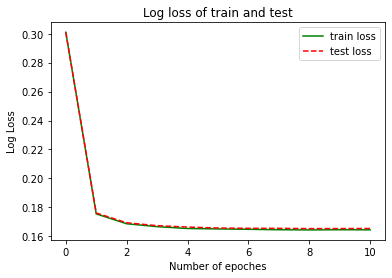

In [17]:
from matplotlib import pyplot as plt 
%matplotlib inline
y=np.arange(0,len(logloss_test))
plt.plot(logloss_train,'g-',label='train loss')
plt.plot(logloss_test,'r--',label='test loss')
plt.ylabel("Log Loss")
plt.xlabel('Number of epoches')
plt.title('Log loss of train and test')
plt.legend()
print('least test logloss {} ... difference between last two loglosses {}'.format(logloss_test[-1],logloss_test[-1]-logloss_test[-2]))
print('least train logloss {} ... difference between last two loglosses {}'.format(logloss_train[-1],logloss_test[-1]-logloss_train[-2]))

# Observation

The diference between SGDClassifier with and without sklearn is  in the order of 10^-4